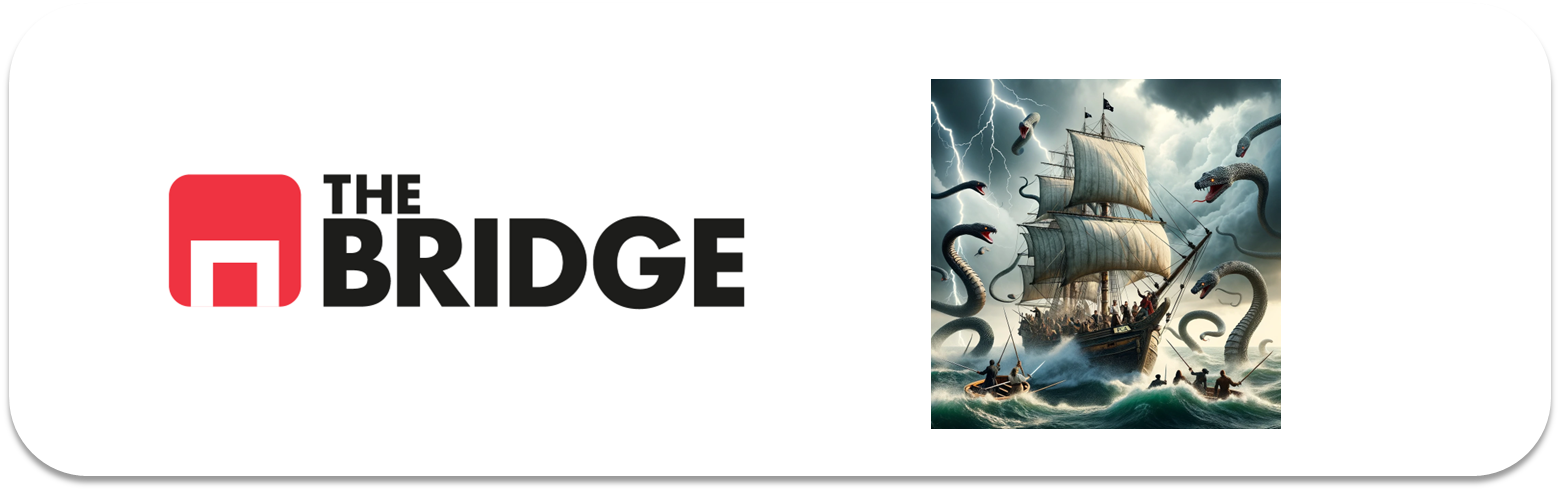

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [106]:
df = pd.read_csv("/Users/lauragarcia/Projects/DS_Online_Febr25_Exercises/04_Machine_Learning/Sprint_14/Unidad_02/Practica_Obligatoria/data/credit_npo.csv")
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [108]:
# Me deshago de los nulos
df.dropna(inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int64  
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 7   NumberOfTimes90DaysLate               11816 non-null  int64  
 8   NumberRealEstateLoansOrLines          11816 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int64  
 10  NumberOfDependents                    11816 non-null  float64
dtypes: float64(4), int64

In [109]:
# Clasificacion de variables
df_tipificacion = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]).T.rename(columns = {0: "Card",1: "%_Card", 2: "Tipo"})
# Ahora ya si las clasificamos en función de los resultados de las operaciones realizadas en el apartado anterior
df_tipificacion["Clasificada_como"] = "Categorica" 
df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion.loc[df_tipificacion["Card"] > 10, "Clasificada_como"] ="Numerica discreta"
df_tipificacion.loc[df_tipificacion["%_Card"] > 30, "Clasificada_como"] = "Numerica continua"
print(df_tipificacion) 

                                       Card     %_Card     Tipo  \
SeriousDlqin2yrs                          2   0.016926    int64   
RevolvingUtilizationOfUnsecuredLines  10314  87.288422  float64   
age                                      78   0.660122    int64   
NumberOfTime30-59DaysPastDueNotWorse     10   0.084631    int64   
DebtRatio                             11472  97.088693  float64   
MonthlyIncome                          4167  35.265741  float64   
NumberOfOpenCreditLinesAndLoans          43   0.363913    int64   
NumberOfTimes90DaysLate                  13    0.11002    int64   
NumberRealEstateLoansOrLines             16    0.13541    int64   
NumberOfTime60-89DaysPastDueNotWorse      8   0.067705    int64   
NumberOfDependents                       10   0.084631  float64   

                                       Clasificada_como  
SeriousDlqin2yrs                                Binaria  
RevolvingUtilizationOfUnsecuredLines  Numerica continua  
age                  

In [110]:
# Las 3 categoricas de numberof, voy a comprobar en cuantas clases las puedo dividir
df['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

NumberOfTime30-59DaysPastDueNotWorse
0     9818
1     1354
2      397
3      127
4       64
5       23
6       20
98      10
8        2
7        1
Name: count, dtype: int64

In [111]:
df['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

NumberOfTime60-89DaysPastDueNotWorse
0     11206
1       478
2        85
3        18
4        14
98       10
5         4
11        1
Name: count, dtype: int64

In [112]:
df['NumberOfDependents'].value_counts()

NumberOfDependents
0.0     6413
1.0     2369
2.0     1813
3.0      881
4.0      251
5.0       61
6.0       24
8.0        2
10.0       1
7.0        1
Name: count, dtype: int64

In [113]:
# Podemos hacer 3 categorias, el 98 es una en sí misma
# Otra categoria sería los que nunca , es decir 0
# otra categoria para el resto
def asignar_nuevo_valor(valor):
  """Asigna un nuevo valor o categoria según el valor de la columna 'a'.

  Args:
    valor: El valor de la columna 'a'.

  Returns:
    '1' si el valor es 0, '1' si el valor es 98, y '2' en cualquier otro caso.
  """
  if valor == 0:
    return 1
  elif valor == 98:
    return 0
  else:
    return 2


In [114]:
# Aplicar la función a la columna 'NumberOfTime30-59DaysPastDueNotWorse' y guardar el resultado en la columna 'Nueva_cat_59_past'
df['Nueva_cat_59_past'] = df['NumberOfTime30-59DaysPastDueNotWorse'].apply(asignar_nuevo_valor)

In [115]:
df['Nueva_cat_59_past'].value_counts()

Nueva_cat_59_past
1    9818
2    1988
0      10
Name: count, dtype: int64

In [116]:
# Aplico la función a las otras dos columnas
df['Nueva_cat_89_past'] = df['NumberOfTime60-89DaysPastDueNotWorse'].apply(asignar_nuevo_valor)

In [117]:
df['Nueva_cat_89_past'].value_counts()

Nueva_cat_89_past
1    11206
2      600
0       10
Name: count, dtype: int64

In [118]:
# Voy a drear otra función muy similar para el número de dependientes
def asignar_nuevo_valor_dependientes(valor):
  """Asigna un nuevo valor o categoria según el valor de la columna 'a'.

  Args:
    valor: El valor de la columna 'a'.

  Returns:
    '0' si el valor es 0, '1' si el valor está entre 1 y 4, y '2' en cualquier otro caso.
  """
  if valor == 0:
    return 0
  elif valor <= 4:
    return 1
  else:
    return 2


In [119]:
df['Nuevo_dependents'] = df['NumberOfDependents'].apply(asignar_nuevo_valor_dependientes)

In [120]:
df['Nuevo_dependents'].value_counts()

Nuevo_dependents
0    6413
1    5314
2      89
Name: count, dtype: int64

In [121]:
# Pasamos a hacer hacer la divison del data set en train y test
X = df.copy()
y = df['SeriousDlqin2yrs'].copy()

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.20, random_state = 42)

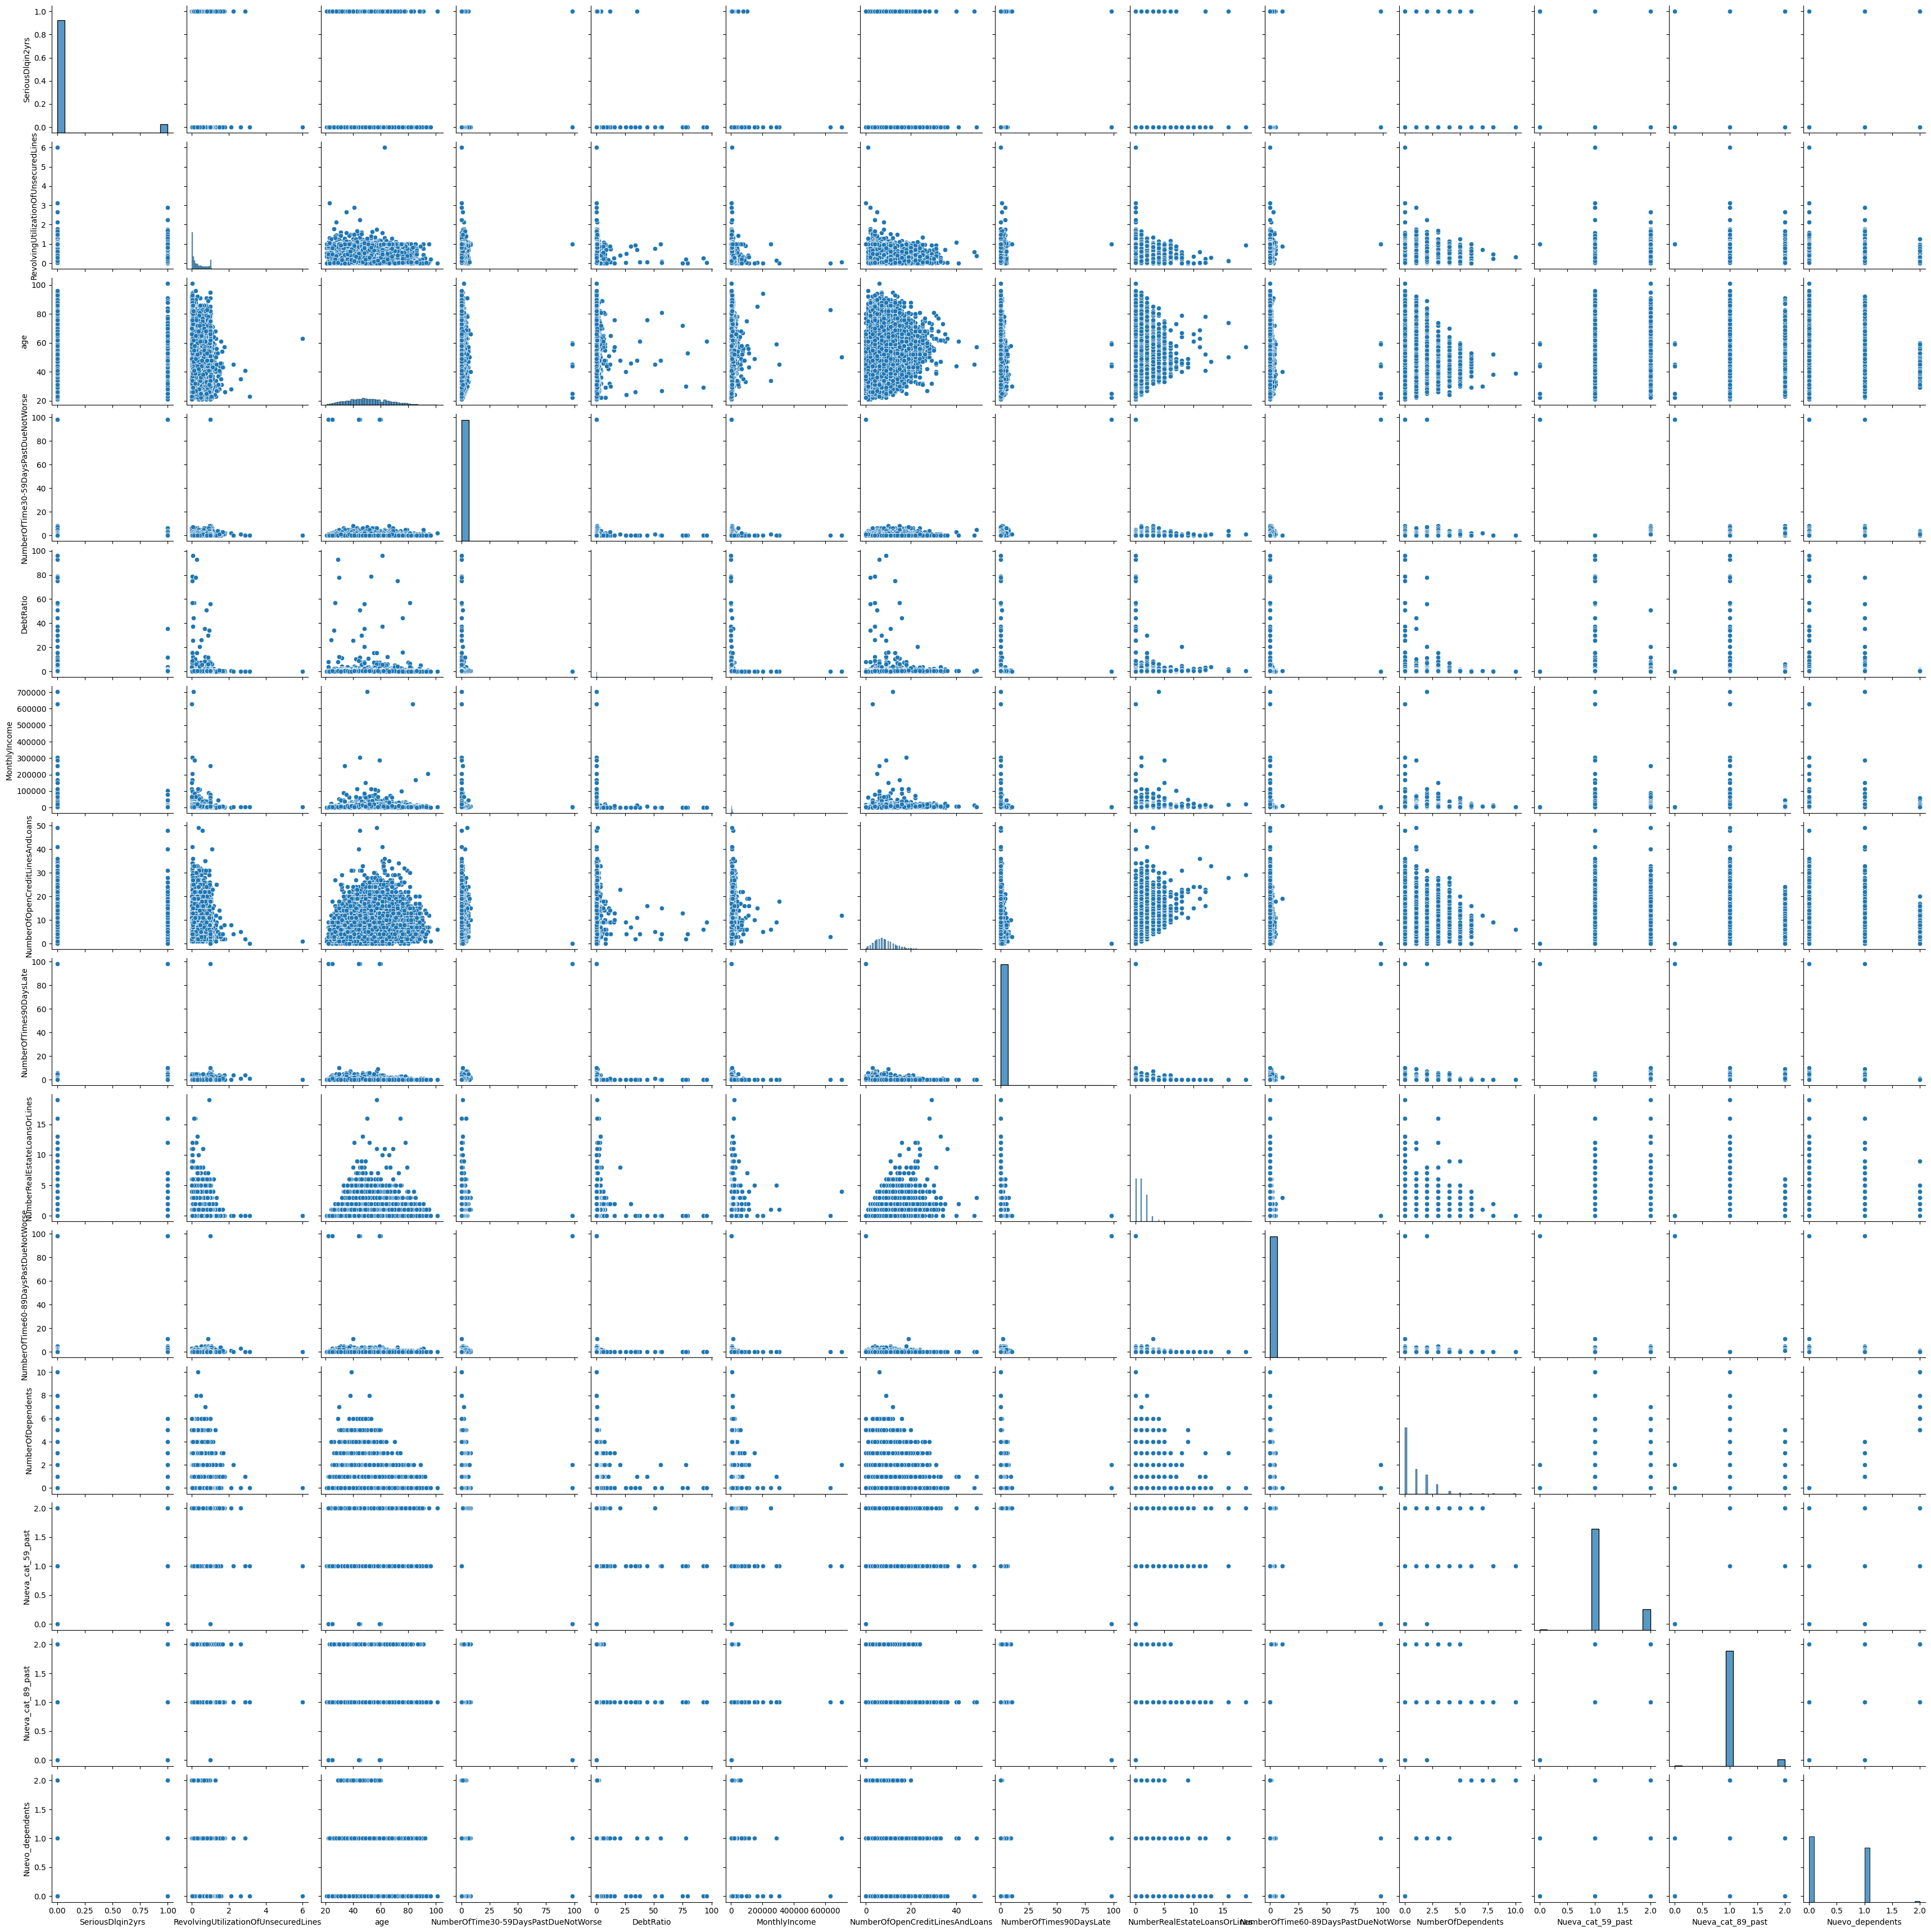

In [122]:
# Una vez reajustadas ciertas variables categóricas,
# vamos a pasar al mini EDA
# Analisis visual de correlacion y umbarl de covarianza
sns.pairplot(X_train)

In [123]:
target = 'SeriousDlqin2yrs'
features_num = X_train.columns.to_list()
features_num.remove('SeriousDlqin2yrs')
features_num

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents',
 'Nueva_cat_59_past',
 'Nueva_cat_89_past',
 'Nuevo_dependents']

In [124]:
# debo quitar también las columnas que modifiqé
features_num.remove('NumberOfTime30-59DaysPastDueNotWorse')
features_num.remove('NumberOfTime60-89DaysPastDueNotWorse')
features_num.remove('NumberOfDependents')
features_num

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'Nueva_cat_59_past',
 'Nueva_cat_89_past',
 'Nuevo_dependents']

In [132]:
#Me da error 
#corr= X_train[features_num].corr()
#serie_corr = np.abs(corr[y_train])
#serie_corr.sort_values(ascending = False)

In [127]:
# Eatablecemos un corte mínimo
#r_minimo = 0.10
#features_num_sel = serie_corr[serie_corr >= r_minimo].index.to_list()
#features_num_sel

In [128]:
#plt.figure(figsize=(10,10))
#sns.heatmap(corr[features_num_sel], annot= True, cmap= "Blues")

In [129]:
# Voy a mirar el umbral de covarianza


In [130]:
# Selección de numericas usando selectKbest y ANOVA
from sklearn.feature_selection import SelectKBest, f_classif

'''
f_classif realiza un test ANOVA
a técnica de análisis de varianza (ANOVA) también conocida como análisis factorial y desarrollada por Fisher en 1930,
constituye la herramienta básica para el estudio del efecto de uno o más factores (cada uno con dos o más niveles) sobre
la media de una variable continua. Es por lo tanto el test estadístico a emplear cuando se desea comparar las medias de
dos o más grupos.
'''
#features_num.remove("quality")
X_train = df[features_num]
y_train = df[target]
selector = SelectKBest(f_classif, k=5)
x_data_kbest = selector.fit_transform(X_train, y_train)
X_train_kbest = pd.DataFrame(x_data_kbest, columns = selector.get_feature_names_out())
X_train_kbest


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTimes90DaysLate,Nueva_cat_59_past,Nueva_cat_89_past
0,0.081892,37.0,1.0,1.0,1.0
1,0.023413,74.0,0.0,1.0,1.0
2,0.000000,43.0,0.0,1.0,1.0
3,0.492754,44.0,0.0,1.0,1.0
4,1.000000,63.0,0.0,1.0,1.0
...,...,...,...,...,...
11811,0.197116,59.0,0.0,1.0,1.0
11812,0.036726,62.0,0.0,1.0,1.0
11813,0.120313,49.0,0.0,1.0,1.0
11814,0.252566,63.0,0.0,1.0,1.0


In [133]:
# Nos daría que las mejores variables son las anteriores

In [134]:
# Seleccion de variables con select model
from sklearn.ensemble import RandomForestClassifier

rf_selector = RandomForestClassifier(random_state= 42)


In [136]:
rf_selector.fit(X_train[features_num],y_train)

RandomForestClassifier(random_state=42)

In [137]:
rf_selector.feature_importances_[rf_selector.feature_importances_ > rf_selector.feature_importances_.mean()]

array([0.20532151, 0.12956078, 0.16464286, 0.16004586, 0.10283427,
       0.10886293])

In [138]:
from sklearn.feature_selection import SelectFromModel
selector_model = SelectFromModel(estimator = rf_selector, threshold= "median") # El modelo debe tener un atributo feature_importances_ o un atributo coef_


In [139]:
selector_model.fit(X_train[features_num],y_train) 

SelectFromModel(estimator=RandomForestClassifier(random_state=42),
                threshold='median')

In [140]:
selector_model.get_feature_names_out()

array(['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',
       'MonthlyIncome', 'NumberOfTimes90DaysLate'], dtype=object)

In [141]:
X_train_model = pd.DataFrame(selector_model.transform(X_train[features_num]), columns = selector_model.get_feature_names_out())
X_train_model

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfTimes90DaysLate
0,0.081892,37.0,0.070709,5656.0,1.0
1,0.023413,74.0,0.209197,4870.0,0.0
2,0.000000,43.0,0.080784,5000.0,0.0
3,0.492754,44.0,0.412735,7333.0,0.0
4,1.000000,63.0,0.000000,8333.0,0.0
...,...,...,...,...,...
11811,0.197116,59.0,0.290216,5140.0,0.0
11812,0.036726,62.0,0.884985,5833.0,0.0
11813,0.120313,49.0,0.577676,6333.0,0.0
11814,0.252566,63.0,0.037640,14000.0,0.0


In [145]:
# Selecion de las mejores features por RFSE
from sklearn.feature_selection import RFE


In [146]:
rf_RFE = RandomForestClassifier(random_state= 42) # Puedes usar tu modelo, o modelos a probar o un modelo "proxy" como en la selección por modelo

rfe = RFE(estimator = rf_RFE,
          n_features_to_select= 5, # Iterará hasta quedarse con 5
          step = 1) # Elimina de una en una, pero es configurable

rfe.fit(X_train, y_train)
print(rfe.ranking_)
pd.DataFrame(rfe.ranking_, columns= ["ranking"], index = features_num).sort_values("ranking")

[1 1 1 1 2 1 3 5 4 6]


,ranking
RevolvingUtilizationOfUnsecuredLines,1
age,1
DebtRatio,1
MonthlyIncome,1
NumberOfTimes90DaysLate,1
NumberOfOpenCreditLinesAndLoans,2
NumberRealEstateLoansOrLines,3
Nueva_cat_89_past,4
Nueva_cat_59_past,5
Nuevo_dependents,6


In [147]:
# Seleccion de features por RSE
from sklearn.feature_selection import SequentialFeatureSelector

rf_SFS = RandomForestClassifier(random_state = 42)

sfs_forward = SequentialFeatureSelector(rf_SFS,
                                        n_features_to_select = 5,
                                        cv = 4,
                                        scoring = "balanced_accuracy")


sfs_forward.fit(X_train, y_train)


SequentialFeatureSelector(cv=4,
                          estimator=RandomForestClassifier(random_state=42),
                          n_features_to_select=5, scoring='balanced_accuracy')

In [148]:
print("Elegidasd SFS:", sfs_forward.get_feature_names_out())

Elegidasd SFS: ['RevolvingUtilizationOfUnsecuredLines' 'NumberOfOpenCreditLinesAndLoans'
 'NumberOfTimes90DaysLate' 'Nueva_cat_59_past' 'Nueva_cat_89_past']


### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.